In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
matrix = df.corr()

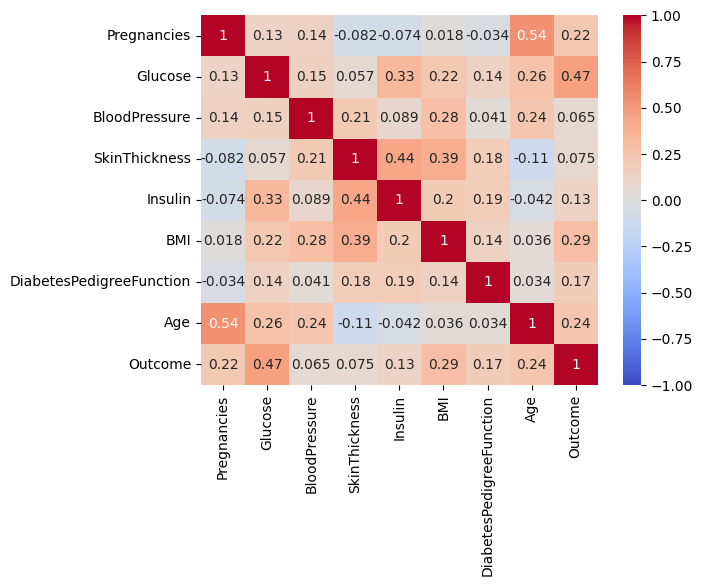

In [ ]:
sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
X = df.drop(columns = ['Pregnancies','BloodPressure' ,'SkinThickness', 'Outcome'])
y= df['Outcome']

In [ ]:
import scipy.stats as stats

# to check zero values

In [ ]:
(X==0).sum()

Glucose                       5
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
X.replace(0,X.mean() , inplace = True)


In [ ]:
X.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,79.799479,33.6,0.627,50
1,85.0,79.799479,26.6,0.351,31
2,183.0,79.799479,23.3,0.672,32
3,89.0,94.000000,28.1,0.167,21
4,137.0,168.000000,43.1,2.288,33


In [ ]:
# for col in X.columns:
#   X[col] =X[col].replace(0,X[col].mean())

<ipython-input-34-1600d60a78a7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( X['Age'] )


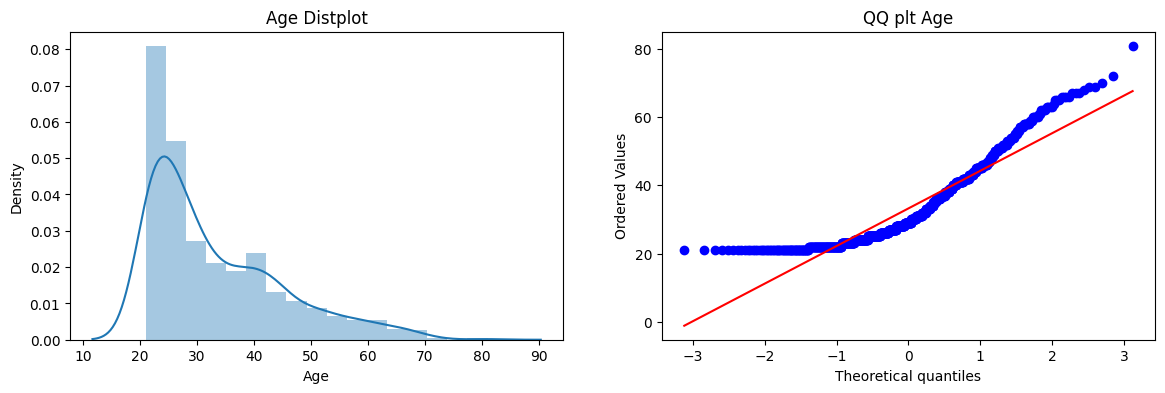

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot( X['Age'] )
plt.title("Age Distplot")

plt.subplot(122)
stats.probplot( X['Age'] ,dist= 'norm', plot= plt )
plt.title("QQ plt Age")
plt.show()

In [ ]:
X.columns

Index(['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

<ipython-input-33-6e959e16840c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( X['Glucose'] )


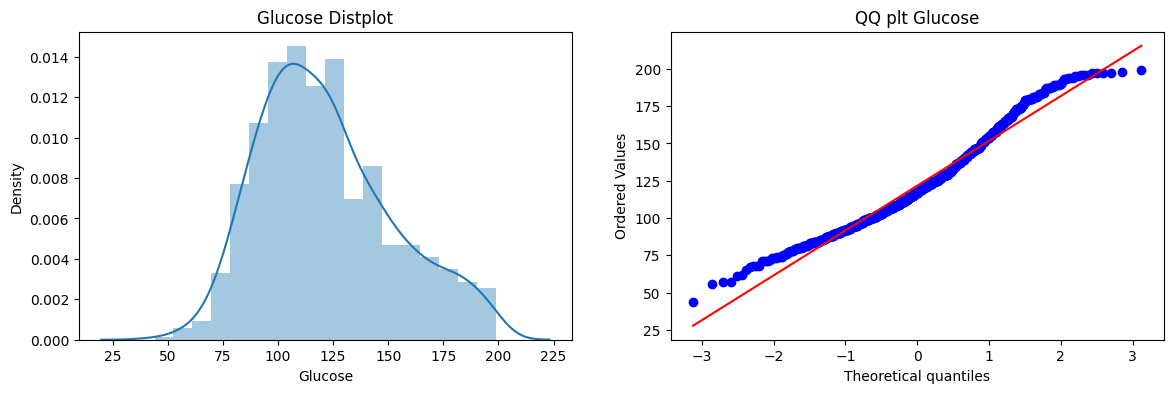

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot( X['Glucose'] )
plt.title("Glucose Distplot")

plt.subplot(122)
stats.probplot( X['Glucose'] ,dist= 'norm', plot= plt )
plt.title("QQ plt Glucose")
plt.show()

<ipython-input-35-d12a7b52e5e7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( X['Insulin'] )


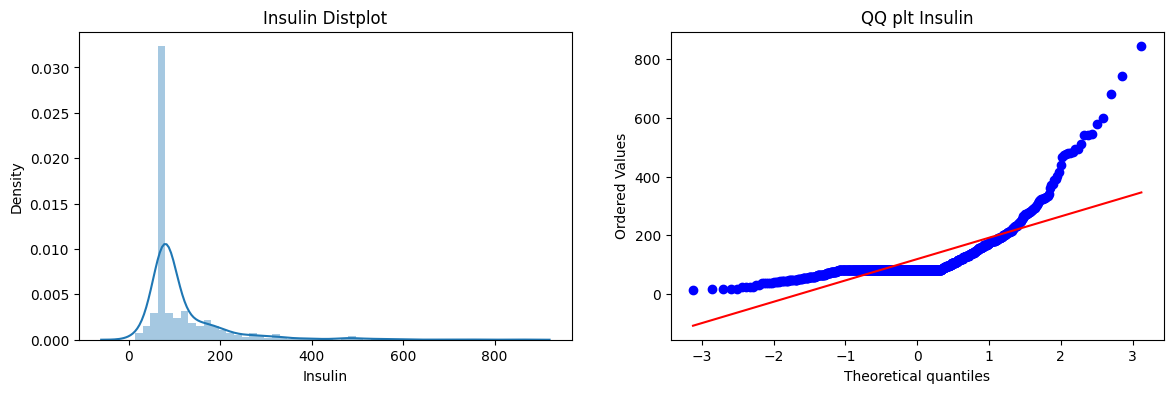

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot( X['Insulin'] )
plt.title("Insulin Distplot")

plt.subplot(122)
stats.probplot( X['Insulin'] ,dist= 'norm', plot= plt )
plt.title("QQ plt Insulin")
plt.show()

<ipython-input-36-e308dfe6087a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( X['BMI'] )


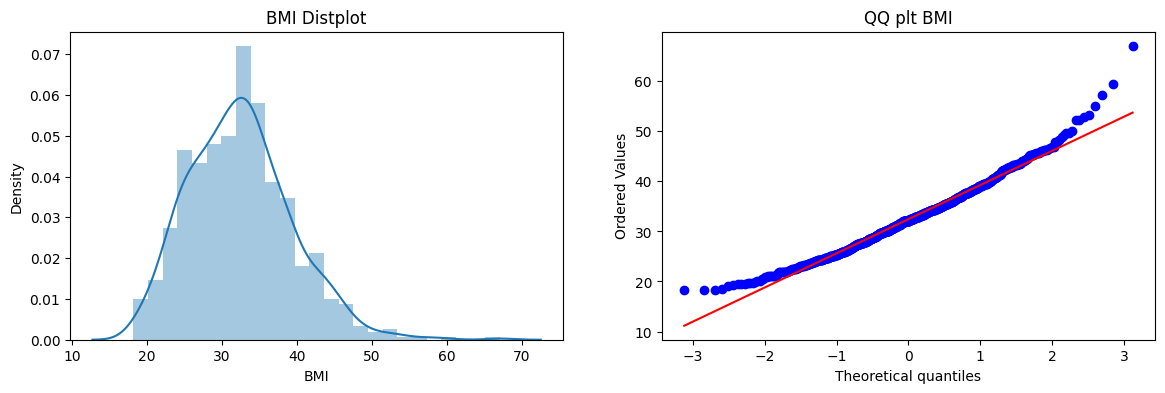

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot( X['BMI'] )
plt.title("BMI Distplot")

plt.subplot(122)
stats.probplot( X['BMI'] ,dist= 'norm', plot= plt )
plt.title("QQ plt BMI")
plt.show()

<ipython-input-37-f4841a41b2d7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( X['DiabetesPedigreeFunction'] )


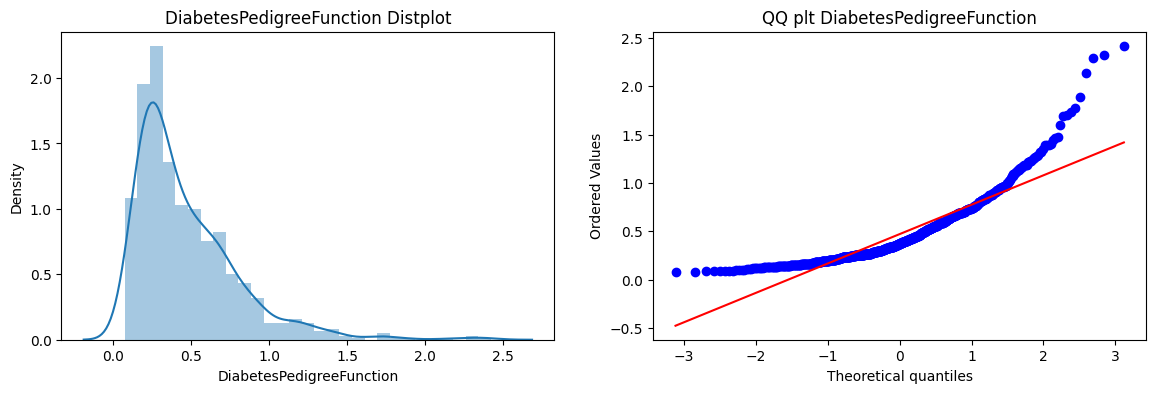

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot( X['DiabetesPedigreeFunction'] )
plt.title("DiabetesPedigreeFunction Distplot")

plt.subplot(122)
stats.probplot( X['DiabetesPedigreeFunction'] ,dist= 'norm', plot= plt )
plt.title("QQ plt DiabetesPedigreeFunction")
plt.show()

# Now split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state= 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy is :", accuracy_score(y_test,y_pred))

accuracy is : 0.7597402597402597


 # Now let's apply the tranformation on skewed data

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Insulin' ,'DiabetesPedigreeFunction' ,'Age'])],remainder='passthrough')

In [ ]:
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.fit_transform(X_test)

In [ ]:
X_train


,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
60,84.0,79.799479,31.992578,0.304,21
618,112.0,79.799479,28.200000,1.282,50
346,139.0,83.000000,28.700000,0.654,22
294,161.0,79.799479,21.900000,0.254,65
231,134.0,370.000000,46.200000,0.238,46
...,...,...,...,...,...
71,139.0,140.000000,28.600000,0.411,26
106,96.0,79.799479,22.400000,0.207,27
270,101.0,79.799479,45.600000,1.136,38
435,141.0,79.799479,42.400000,0.205,29


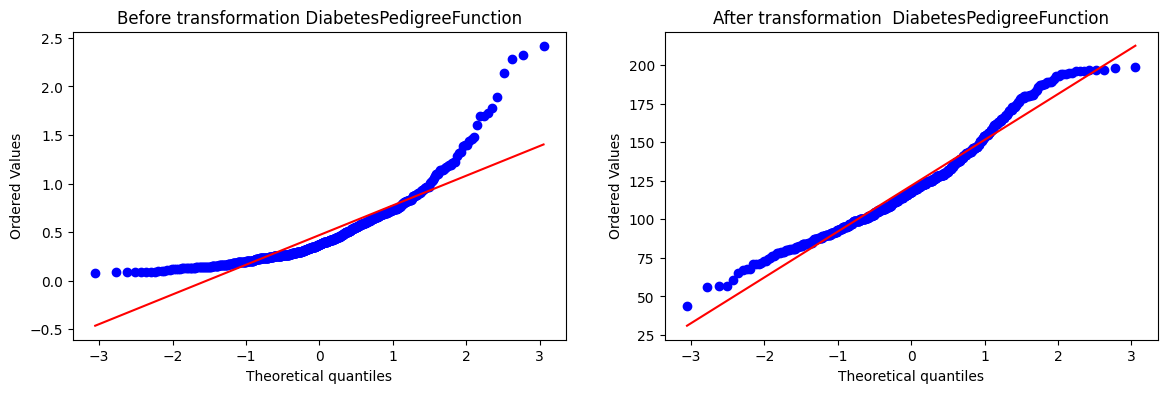

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot( X_train['DiabetesPedigreeFunction'] ,dist= 'norm', plot= plt )
plt.title("Before transformation DiabetesPedigreeFunction")

plt.subplot(122)
stats.probplot( X_train_trans[:,3] ,dist= 'norm', plot= plt )
plt.title("After transformation  DiabetesPedigreeFunction")
plt.show()

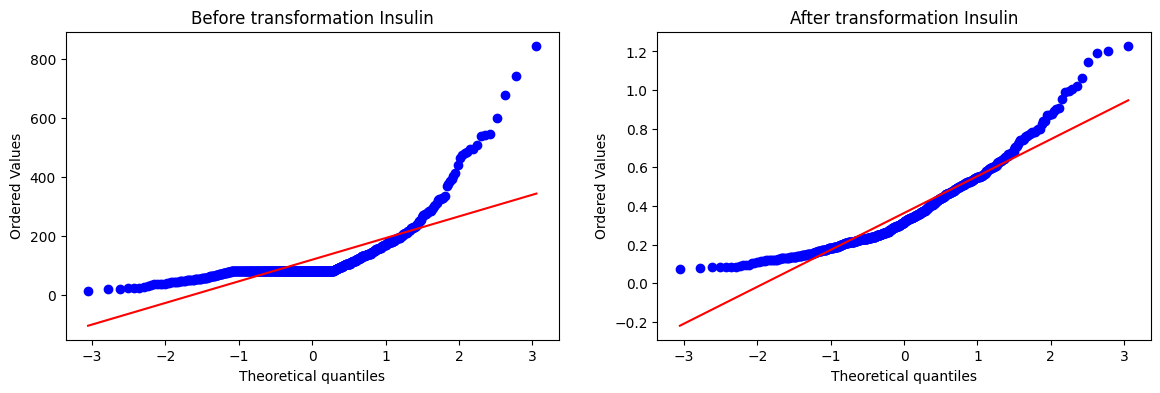

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot( X_train['Insulin'] ,dist= 'norm', plot= plt )
plt.title("Before transformation Insulin")

plt.subplot(122)
stats.probplot( X_train_trans[:,1] ,dist= 'norm', plot= plt )
plt.title("After transformation Insulin")
plt.show()

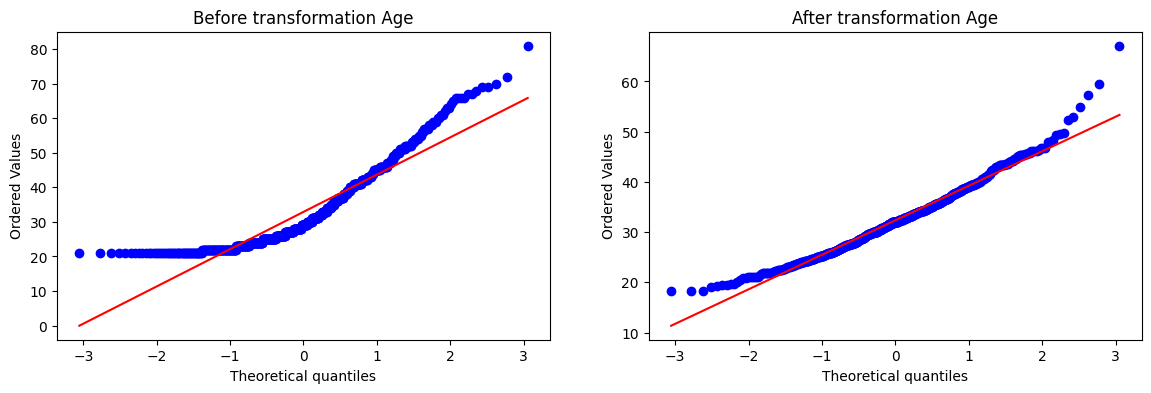

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot( X_train['Age'] ,dist= 'norm', plot= plt )
plt.title("Before transformation Age")

plt.subplot(122)
stats.probplot( X_train_trans[:,4] ,dist= 'norm', plot= plt )
plt.title("After transformation Age")
plt.show()

In [ ]:
clf2 = LogisticRegression()

clf2.fit(X_train_trans,y_train)

LogisticRegression()

In [ ]:
y_pred2 = clf2.predict(X_test_trans)

In [ ]:
print("accuracy after transformation:" , accuracy_score(y_test,y_pred2))

accuracy after transformation: 0.7662337662337663


# so we can see some improved accuracy after transformation